# Supervised Learning

## Popular Models <a id="top"></a>
1. <a href="#k">K-Nearest Neighbors</a>
2. <a href="#linear">Linear</a>
3. <a href="#naive">Naive Bayes</a>
4. <a href="#decision_trees">Decision Trees</a>
5. <a href="#k_svm">Kernelized SVMs</a>
6. <a href="#neural_nets">Neural Networks</a>

In [26]:
%matplotlib inline
import os
import sys

import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd

import mglearn

## Classificaition and Regression
<header>Classification</header>
predict a class label IE (setosa, versicolor, virginica) between <br>
_Binary_ (yes/no -- like Spam email), and _Multiclass_ (From predefined list -- setosa, versicolor, virginica).<br>
<header>Regression</header>
Predict a continuous number (floating point or Real number), rather than a predefined class. <br>
consider predicint income based on age, education, and location.<br>

## Generalization, Overfitting, and underfitting

To make accurate prediction on unseen data, we need to _generalize_ from the training set<br>
generalization is between overfitting (too complex) and underfitting data (too simple).<br>
We always want the simpliest model.

>**RULE** do not evaluate a model on training data it has already seen

Model complexity is tied to the diversity of inputs in training set. Think of it as experience.

_classification variant_
_regression variant_

## Datasets we're going to use <a id="data"></a>
**binary**
1. <a href="#forge">Forge Dataset</a>
2. <a href="#cancer">Cancer Dataset</a>

**multi**
1. <a href="#wave">Wave Dataset</a>
2. <a href="#boston">Boston Housing Prices</a>

## For binary classification... 
### The Forge Dataset. <a id="forge"></a>
<a href="#data">more data.</a>

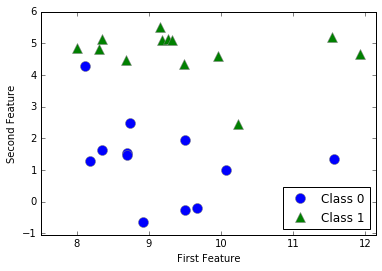

In [37]:
# simplistic, low-dimenstionality
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4, numpoints=1)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")

In [26]:
X.shape

(26, 2)

In [39]:
np.unique(y)

array([0, 1])

### Cancer Dataset <a id="cancer"></a>
High dimensional and real-world

<a href="#data">more data.</a>

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['feature_names', 'target', 'data', 'DESCR', 'target_names'])

In [7]:
cancer.data.shape

(569, 30)

In [9]:
print("Sample counts per class:\n{}".format({n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'benign': 357, 'malignant': 212}


In [10]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

### For Regression...

#### Wave Dataset <a id="wave"></a>
simplistic, low-dim

<a href="#data">more data.</a>

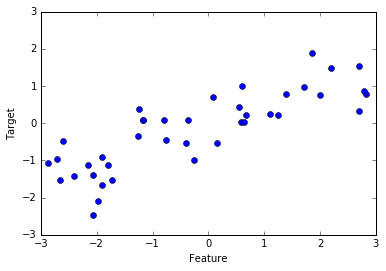

In [40]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [41]:
X.shape

(40, 1)

### Boston Housing <a id="boston"></a>
High-dim, real-world dataset

<a href="#data">more data.</a>

In [15]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape

(506, 13)

In [16]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Revisiting k-Nearest Neighbors <a id="k"></a>
Important params:<br>
**n_neighbors** the number of neighbors used to vote on prediction

1. <a href="#k_class"> KNN Classification</a>
2. <a href="#k_reg"> KNN Regression</a>

<a href="#top">top</a>

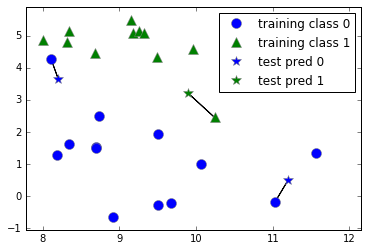

In [2]:
k = 1
mglearn.plots.plot_knn_classification(n_neighbors=k)

note: the prediction = the label of the closest point.

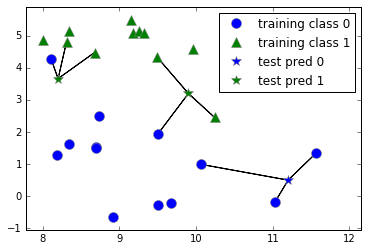

In [3]:
k = 3
mglearn.plots.plot_knn_classification(n_neighbors=k)

note: the prediction = the label with the most neighbors. _voting_: democratic!

### K-Nearest Neighbors example
Using the <a href="#forge">forge datbase</a>.

In [7]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

array([  1.19000000e+01,   1.46500000e+01,   7.81100000e+01,
         4.32800000e+02,   1.15200000e-01,   1.29600000e-01,
         3.71000000e-02,   3.00300000e-02,   1.99500000e-01,
         7.83900000e-02,   3.96200000e-01,   6.53800000e-01,
         3.02100000e+00,   2.50300000e+01,   1.01700000e-02,
         4.74100000e-02,   2.78900000e-02,   1.11000000e-02,
         3.12700000e-02,   9.42300000e-03,   1.31500000e+01,
         1.65100000e+01,   8.62600000e+01,   5.09600000e+02,
         1.42400000e-01,   2.51700000e-01,   9.42000000e-02,
         6.04200000e-02,   2.72700000e-01,   1.03600000e-01])

In [7]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [8]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [14]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


### How to we analyze the Kneighbors classified? <a id='k_class'></a>
using a _decision boundry_ illustrates the divide between where the algorithm classifies class 0 vs. class 1 for all test points.

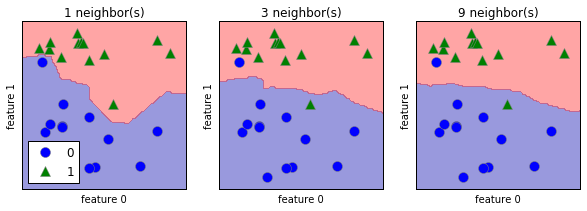

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3,numpoints=1)

1 neighbor follows the training data closely.<br>
More neighbors = smooth _decision boundry_, which correspondes to a simpler model.<br>
Less neighbors = more model complexity

### Connection between model complexity and generalization using Breast Cancer dataset

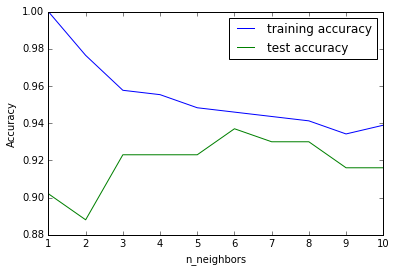

In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record genrealization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### Signs of over/underfitting
Training accuracy decreases with more neighbors (more simplicity).<br>
When there is one neighbor the training set will hit itself, and be perfect.<br>
Yet is too complex to fit test.<br>
Too many neighbors is too simplistic, and test accuracy suffers.<br>
Ideal is ~6 neighbots.

## K-neighbors regression <a id='k_reg'></a>
using the <a href="#wave">wave</a> dataset.

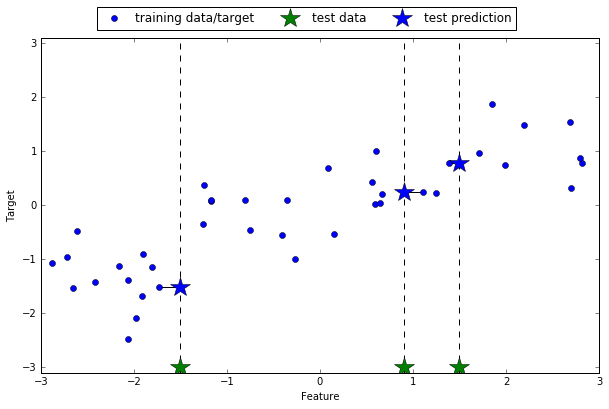

In [27]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

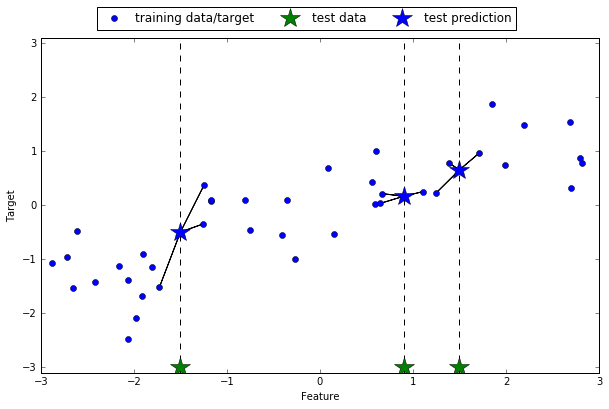

In [28]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

When using multiple nearest neighbors, the prediction is the average of the neighbors.

In [43]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate model with 3 NN
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [44]:
print("Test set prediction:\n{}".format(reg.predict(X_test)))

Test set prediction:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


Scoring a regressor is done with _R<sup>2</sup>_ score or the coefficient of determination

In [47]:
print("Test set R^2: {:,.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


### Analysing KNeighbors Regression
How do the number of NN influence the accuracy of predictions for the learning set, and the training set.<br>
Accuracy of the prediction to the learning set shows the weight of the learning set for the prediction

In [52]:
np.linspace(-3, 3, 1000).shape

(1000,)

In [53]:
np.linspace(-3, 3, 1000).reshape(-1, 1).shape

(1000, 1)

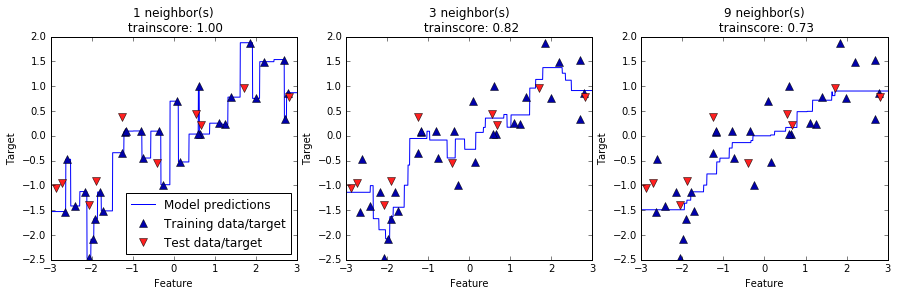

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 data points, evenly spaces between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbor(s)\n trainscore: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best", numpoints=1)

Using only one neighbor is too complex, and leads to an unstready prediction.<br>
More neighbors leads to a smoother prediction, that doe snot fit the training data well.

## Discussion of KNeighbors
Good baseline before more advanced techniques.

Two Params for KNN - 
1. Number of Neighbors<br>Typically 3 or 5 work well
2. How distance is measured between data points<br>Euclidean distance often used.


_Strengths_<br>
Easy to understand and Reasonable performance w/out a lot of adjustments<br>
Quick to process model (**Make sure to preprocess data**) with reasonable data size.<br>
_Weaknesses_<br>
Works poorly with DS with many features. Even worse when most features are 0, or _sparse datasets_<br>
Performs poorly when training set is very large (feature and sample-wise).

## Linear Models <a id="linear"></a>
Very fast to train and predict.<br>
Scale to very large data sets.<br>
Works with sparse data.<br>
Easy to understand how a prediction is made.<br>
Work best when num of features >> number of samples.<br>
Bad at gernalizeing low-dimensional data

1. <a href="#linear_reg">Linear regression</a>
2. <a href="#ridge">Ridge regession</a>
3. <a href="#lasso">Lasso</a>
4. <a href="logistic">Logistic regression</a>
5. <a href="#svc">SVC</a>

<a href="#top">Top</a>

### Linear models for regression
Characterized as regression models with a prediction line or a single feature, a plane for two, and hyperplane for 3+

y&#770; = _w_[0]* _x_[0] + _w_[1] * _x_[1] + ... _w_[p] * _x_[p] + _b_ <br>
Where:<br>
_x_[0] to _x_[p] are features up to p.<br>
_w_, _b_ are params of the model that are learned.<br>
y&#770; weighted sum of input feature(s).

For a single feature dataset:<br>
y&#770; = _w_[0]* _x_[0] + _b_<br>
the equation for a line:<br>
_w_[0] is slope for each feature axis<br>
b is y-intercept<br>

Let's learn _w_[0] and _b_ from the **one-dimensional** <a href="#wave">wave dataset</a>.

w[0]: 0.393906  b: -0.031804


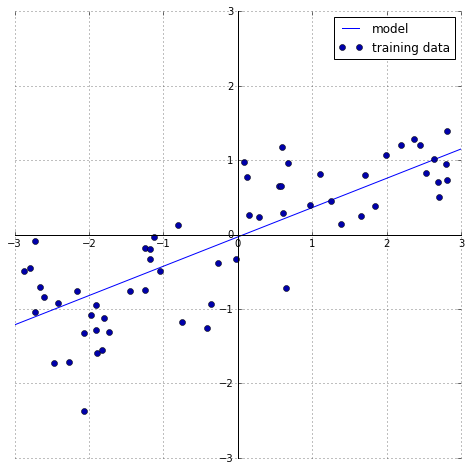

In [61]:
mglearn.plots.plot_linear_regression_wave()

Compared to <a href-"#k_reg">K-Neighbors Regression</a>, fine details seem lost.<br>
However, this works well for Datasets with many features.<br>
Esp if features >> training data.

## Linear regression <a id="linear_reg"></a>
via _ordinary least squares_ tunes _w_ and _b_ to minimize _mean squared error_ between predictions and regression line. <br>Note there is no control over model complexity!

In [32]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

The slope of the line is also called a weight or coefficient _w_.<br>
While the y-intercept, or offset is _b_.

In [70]:
# note this is the same as above.
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept:{}".format(lr.intercept_))

lr.coef_:[ 0.39390555]
lr.intercept:-0.031804343026759746


there can be multiple slopes (one per feature), so the coeff _w_ is an array.<br>
Wave only has one feature, so in this case _w_ has one element.

In [73]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score R^2: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score R^2: 0.66


Because both training and test scores are close, we're likely **underfitting.**<br>
Note that: 1D datasets have no danger of overfitting due to it's simplicity.<br>
With higher-dimensional data (w/ larger num of features) linear models are more powerful (sensitive) with higher chance of ovefitting.

To explore this, let's look at the <a href="#boston">Boston</a> dataset.

In [95]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [96]:
X.shape

(506, 104)

In [75]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Prediction on training set is solid but R<sup>2</sup> on test is not so good.<br>
Discrep bewtween training and test set shows **overfitting.**<br>
We thus need to control complexity, suggesting we check out...

### Ridge Regression <a id="ridge"></a>
Linear model with **control over model complexity**.<br>
Same formula as _Orinary Least Squares_ but _w_ chosen to predict well on training set, **and** fit an additional constraint. <br>
Want to minimize the magnitude of coefficient **_w_** (near-zero), reducing the weight of each feature of the training set. This makes the slope look like a straight line.

Let's introduce an important concept:<br>
_regularization_, whichis explicitly restricitng model to avoid overfitting.

Ridge uses L2 Regularization:<br>
Penalizes the L2 norm of the coefficients, or the Euclidean length of _w_.

Important params:<br>
**alpha** Defaults to 1.0, Alpha is inversely related to coeffs (w) IE high Alpha means more restriced model.

In [77]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


This is as we expect.<br>
Ridge is less complex model: it is more restricted, so we don't run into overfitting data (as we did in OLS).<br>
Ridge is a trade off between simplicity (better generalization) and training set performance.<br>

This trade off can be defined using the a regularization parameter Alpha.

In [78]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


So as alpha increases,<br>
coeffs (slope moves towards 0) become more restricted.<br>
This makes models **less complex**.

As alpha decreases,<br>
coeffs are less restricted resembling Linear Regression. <br>
This makes models **more complex**.

In [80]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Increasing complexity reduces the Test Score and Training Score.

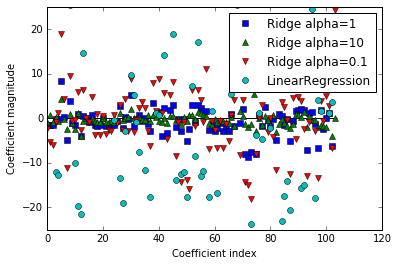

In [84]:
plt.plot(ridge.coef_,'s', label="Ridge alpha=1")
plt.plot(ridge10.coef_,'^', label="Ridge alpha=10")
plt.plot(ridge01.coef_,'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(numpoints=1)

This illustrates over/underfitting, where a high alpha (low coeff) leads each feature (x-axis) to have similar _w_ with range(-3,3)<br>
and for low alpha features have a wide range of _w_ values.

This next plot illustrates a fied alpha with a changing training set size.

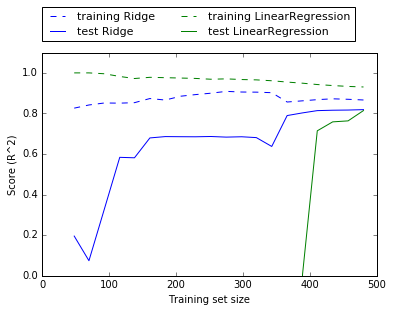

In [85]:
mglearn.plots.plot_ridge_n_samples()

Regularization is relevant to smaller training sets.<br>
As test size increase, the choice between models is less imporant for test scores.<br>
However, regularized models will always get a lower training score.

### Lasso <a id='lasso'></a>
Typically Ridge is first choice, but Lasso shines with feature-rich data where only a few are relevant.<br>
Lasso regularizes data with L1 regularization:<br>
Penalizes the L1 norm of the coeff vector by the sum of absolute values of coefficients.<br>
Makes some coeffs 0--  ignoring some features, which is useful it only a few features are important.

Important params:<br>
**alpha**

In [104]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score : {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {} out of {}".format(np.sum(lasso.coef_ != 0),X_train.shape[1]))

Training set score: 0.29
Test set score : 0.21
Number of features used: 4 out of 104


Poor training and test scores indicate **underfitting**.<br>

Lasso also takes a regularization parameter Alpha:<br>
Controls how strongly _w_ is pushed towards 0.<br>
As Alpha goes down, the number of iterations (max_iter) must go up.

In [105]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score : {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {} out of {}".format(np.sum(lasso001.coef_ != 0),X_train.shape[1]))

Training set score: 0.90
Test set score : 0.77
Number of features used: 33 out of 104


In [106]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {} out of {}".format(np.sum(lasso00001.coef_ != 0),X_train.shape[1]))

Training set score: 0.95
Test set score : 0.64
Number of features used: 94 out of 104


Setting alpha too low rids any benefits from regularization by over-fitting.

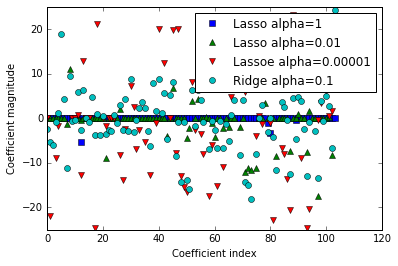

In [109]:
plt.plot(lasso.coef_,'s', label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v', label="Lassoe alpha=0.00001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(numpoints=1)

## Linear Models for Classification
y&#770; = _w_[0]* _x_[0] + _w_[1] * _x_[1] + ... _w_[p] * _x_[p] + _b_ > 0 <br>
Almost the same as regression, but the predicted value is thresh

### Binary Classification
Rather then a weighted sum in linear regression<br>
y&#770; is a _decision boundry_ that separates two classes through input.

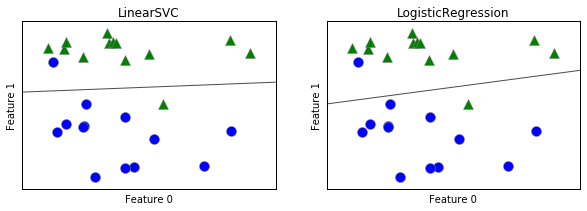

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

Note both these models use L2 regularization.<br>
Both these models' trade off parameter is C.<br>
As C decreases, _w_ increases, regularization increases, slope close to zero, generalized.<br>
As C increases, _w_ decreases, correcting for misclassification, overfit.

Note linear models are restrictive in low-dims, but powerful in preventing overfitting in feature-rich samples.

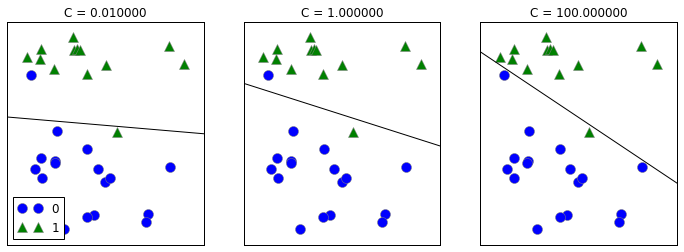

In [4]:
mglearn.plots.plot_linear_svc_regularization()

### Linear Logistic Regression <a id="logistic"></a>
Note this is a classifier algo, and not a regression algo.<br>
Important Params:<br>
**C** Complexity defaults to 1

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


Close training and test scores show **underfitting**.<br>
The model is thus too simple, let's increase complexity of the model by tuning C up.

In [8]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.967
Test set score: 0.965


Let's see what happens when we overregularize the model by tuning C down.

In [9]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


The regularization penalty is what matters. It defaults to L2, we can try L1.

In [10]:
logreg001 = LogisticRegression(C=0.01,penalty='l1').fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.918
Test set score: 0.930


### Multiclass Classification
Extend binary classification through the _one-vs.-rest_ approach:<br>
Binary model is learned for each class, and used to separate that class from all others.<br>
Each class' binary model is run on a test point, and the highest score is the class that wins.

_w_[0] * _x_[0] + _w_[1] * _x_[1] ... _w_[p] * _x_[p] + _b_


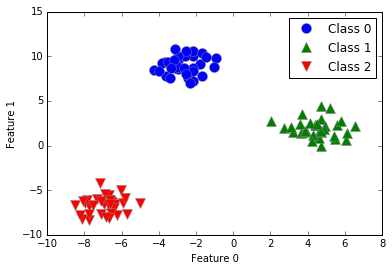

In [11]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"], numpoints=1)

### Using Linear SVC <a id="svc"></a>
Support Vector Classifier.

In [14]:
X.shape

(100, 2)

In [12]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shapre: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shapre:  (3,)


each row of the coef contains one of three classes<br>
each col of the coef contains one of two features.<br>
the intercept array stores the intercept of each class

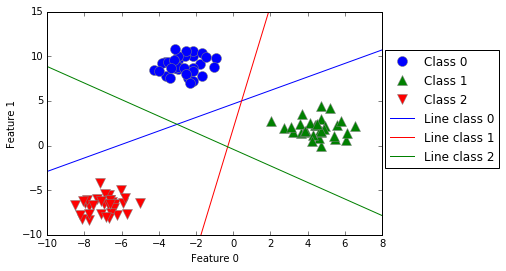

In [18]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3), numpoints=1)

Points that fall within the triangle in the middle are referred to as rest<br>
where the prediction is the highest value for the classification formula

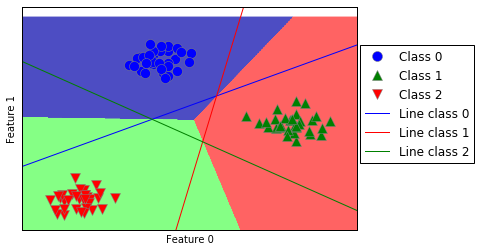

In [19]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3), numpoints=1)

Main parameter of linear models is regulation parameters:<br>
alpha for regression models<br>
C in LinearSVC and LogisticRegression.<br>
These are typically searched for on a log scale.<br>
Default to L2, unless L1 if we know there are only a few features we're interested in.

## Naive Bayes Classifiers <a id="naive"></a>
Fast to train and predict. training is easy to understand.<br>
work well w/ high-dim sparese data.<br>
great baseline on very large data sets, where linear models take too long.

1. <a href="#gaussian">Gaussian</a>
2. <a href="#bernoulli">Bernoulli</a>
3. <a href="#multinomial">Multinomial</a>

<a href="#top">Top</a>

### Gaussian <a id="gaussian"></a>
Used for Continuous data.<br>
Stores average value and standard deviation of each feature for each class.<br>
Used on high-dimensional data (only non binary classifier).<br>

### Bernouli <a id="bernouli"></a>
Used for Binary Data, often in text data classification.

Important params:<br>
**Alpha** Greater Alpha leads to more smoothing, by adding alpha positives to all features.

In [38]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])

y = np.array([0, 1, 0, 1])

0 and 1 are the two classes.

In [22]:
counts = {}
for label in np.unique(y):
    # iterate over each class.
    # count (sum) entities of 1 per features.
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [43]:
X[y == 0]

array([[0, 1, 0, 1],
       [0, 0, 0, 1]])

In [41]:
X[y == 1]

array([[1, 0, 1, 1],
       [1, 0, 1, 0]])

### Multinomial <a id="multinomial"></a>
Used for count data, where each features represents an integer count.<br>
Often in text data classification.<br>
Takes into account average value of each feature for each class.<br>

Important params:<br>
**Alpha** Greater Alpha leads to more smoothing, by adding alpha positives to all features.

## Decision Trees <a id="decision_trees"></a>
A series of if/then statements that partitions the data into nodes.<br>
Easily visualized and understood<br>
Not dependent on data scaling, data preprocessing.<br>
Works well with features that are on dif. scales IE binary and continuous<br>
Tends to overfit and is not great at generalizing

1. <a href="#class_tree">Decision Tree Classification</a>
2. <a href="#reg_tree">Decision Tree Regrssion</a>
3. <a href="#random_forest">Random Forest</a>
4. <a href="#grad_tree">Gradient Boosted Regression Trees/Machines</a>

<a href="#top">Top</a>

Each node is a question or an answer (then called a terminal node or leaf).<br>
The edges connects the answer to next question.

### Building Decision Tree
Must learn a sequence of _tests_ or if/else statements.<br>
for continuoud data, the _test_ is often "Is feature _i_ larger than value _a_?"<br>
Search all possible _tests_ to find most informative and efficient per feature.<br>

The top node is called the _root_ containing the entire dataset.<br>
Each test concerns only a single feature, the resulting partition is axis-paralell.<br>
Partitioning is repeated until each reigon contains a single target value.<br>
A leaf containing data that all all share the same target value is called _pure_.

### Controlling complexity <a id="class_tree"></a>
The quest for _pure_ leaves leads to over-fitting and high complexity.<br>
To prevent this we can limit max leaves of the tree or _pre-prune_<br>
or remove nodes with little info _post-pruning_.

In [9]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy of training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy of test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy of training set: 1.000
Accuracy of test set: 0.937


100% training accuracy means pure leaves.<br>
It overfits as it traverses an arbitrary depth.<br>Let's prune it.

In [10]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy of training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy of test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy of training set: 0.988
Accuracy of test set: 0.951


In [12]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=['malignant', 'benign'],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [17]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Feature importance
Rather than look at the whoel tree, we can analyze rates how important each feature is for the decision a tree makes from 0 to 1.

In [20]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


_feature importance_ can be visualized as follows:

In [23]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

<IPython.core.display.Javascript object>


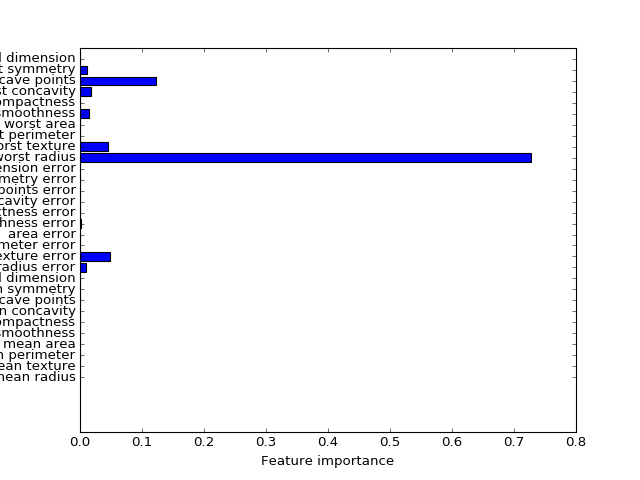

In [24]:
plot_feature_importances_cancer(tree)

Most impotant reature used in the top split is worst radius.<br>
However, low _feature importance_ doesn't necessarily mean a feature is uninformative.<br>
Moreover, it does not show a simple relationship between features and class.

Feature importances: [ 0.  1.]


NameError: name 'display' is not defined

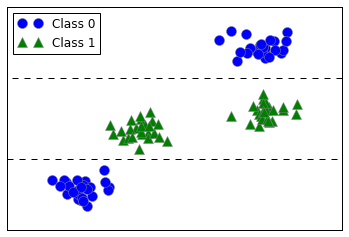

In [27]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

### Decision Tree Regression <a id="reg_tree"></a>
Can't extrapolate, or make predictions outside the range of the taining data.

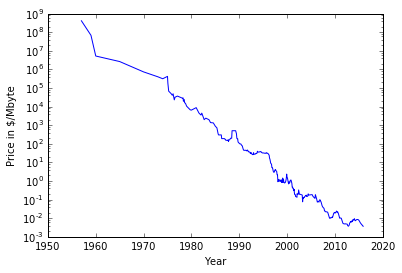

In [31]:
ram_prices = pd.read_csv("introduction_to_ml_with_python/data/ram_price.csv")

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

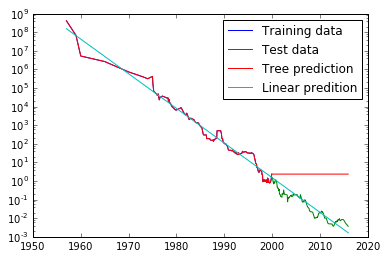

In [42]:
from sklearn.tree import DecisionTreeRegressor
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear predition")
plt.legend(numpoints=1)

The tree model overfits the data, scoring perfectly for the training data, but only retuning the latest known point for new reponses. Trees are not good at predicting non-known classes.

## Random Forests <a id="random_forest"></a>
An example of an _ensemble_ or combination of multiple ML models.<br>
Build many unique trees that predict the target reasonably and average the results.<br>
Randomized by data selection and features used to split each _test_.
Randomness forces algo to consider more possible explainations, captures a broader pic than a single tree.

Scales well with data<br>
All benfits of decision trees, but makes up for overfitting<br>
Tends to be deeper than decision trees<br>
Requires more memory and slower to train an predict than linear models<br>
Linear models better for high-dim sparse data (like text)

Important arguments:<br>
**n_jobs** used to parallel jobs<br>
**n_estimators** number of trees to generate.Averaging more trees leads to robust ensemble<br>
**max_features** how random each tree is. Smaller max_features reduces overfitting.

Note: default args tend to work best.

### bulding random forests
first take a _bootstrap sample_ ie<br>
[a, b, c, d] -> [b, d, d, c] -> [d, a, d, a]<br>
Data points can repeat but combinations cannot.
Each tree is built on one of these samples, and are thus all different.<br>
Each node finds the best _test_ from a subset of features.

Param to change is max_features:<br>
low max_features -> trees are v different, could be deep to fit data<br>
high max_features -> trees are similar, can fit data easily

Predictions are made on all models, and each tree gets a vote.

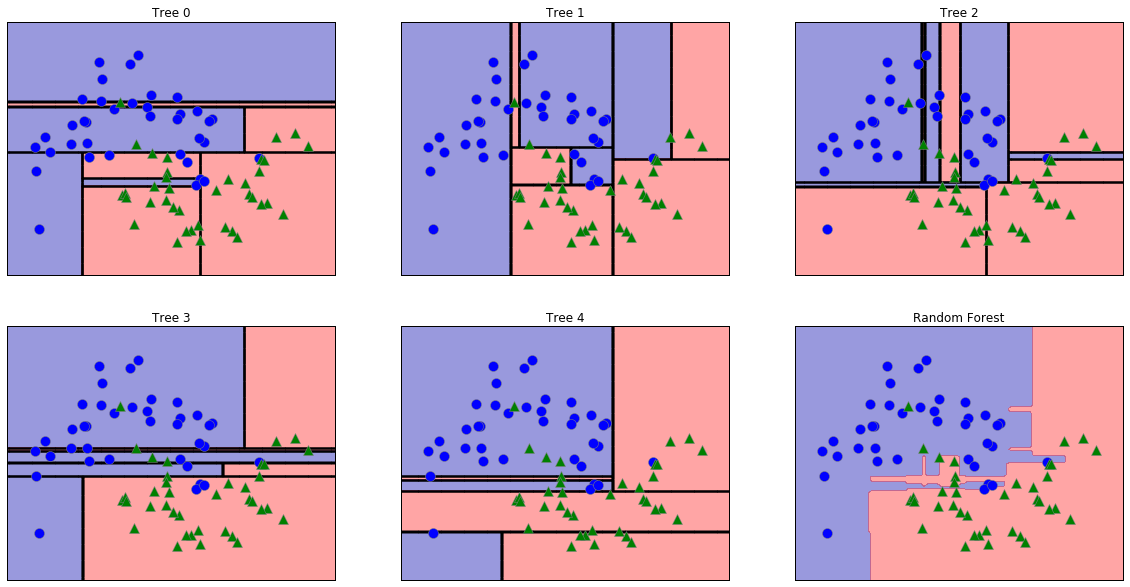

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1,-1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


Could alter max_features or pre-pruning, but default for random forest works well

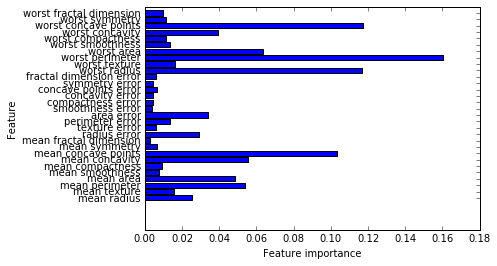

In [50]:
plot_feature_importances_cancer(forest)

Random forest gives nonzero importance to more features than decision trees.

## Gradient Boosted Regression Trees (Gradient Boosting Machines) <a id="grad_tree"></a>
No randomization in this ensemble, rather trees made sequentially to correct mistakes of the previous tree.<br>
Each tree should be simple (and shallow), only providing good predictions on part of the data.

Most powerful and widely used models for supervised learning<br>
Requires careful tuning<br>
Takes a long time to train<br>
Does not work well with high-dim sparse data<br>

Important params:<br>
**learning rate** how strongly each tree tires to correct it's predecessor, how complex tree is. Default 0.1<br>
**n_estimators** num of trees in ensemble, adding increases model complexity. Default 100<br>
**max_depth** how deep trees will go (keep it simple!). Default 3<br>

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [58]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [59]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


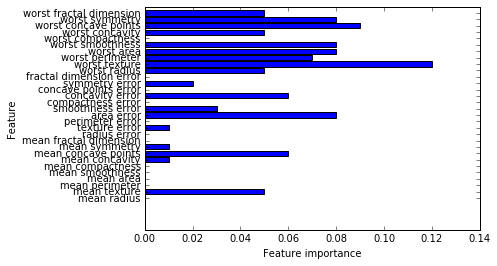

In [60]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

Feature importances are similar to random forests, although some features completely ignored.

## Kernalized Support Vector Machines (for classification) <a id="k_svm"></a>
SVM allows complex decision boundries for low to high-dim data<br>
Data needs to have similar units or magnitude<br>
Thus preprocessing is needed<br>
Very sensative to model parameters

Important params:<br>
**C** Regularization parameter, importance of each point<br>
**gamma** width of Gaussian Kernel, what it means for points to be close

<a href="#top">Top</a>

Make linear models more flexible by adding more geatures like polynomials and inputs.<br>
Let's try two-class classification on a dataset where classes are not linearly separable.

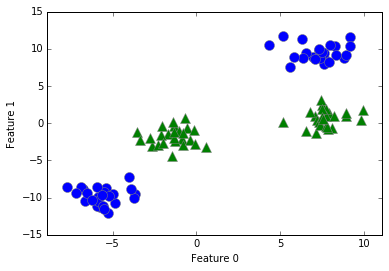

In [63]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

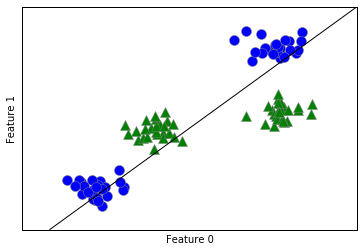

In [64]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Nope nope nope... Let's make a third dimension, feature1^2

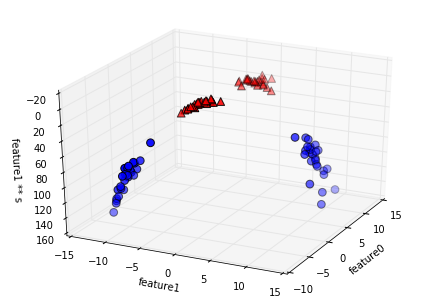

In [65]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

How we can separate the two classes using a linear model

In [72]:
coef

array([ 0.11528455, -0.19435265, -0.05541958])

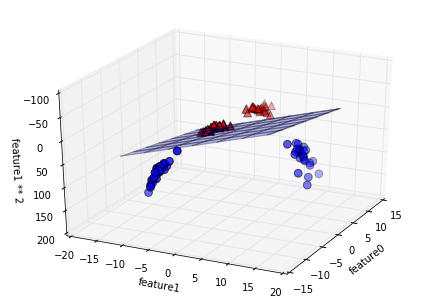

In [73]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

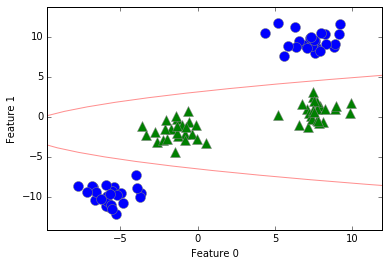

In [76]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contour(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Decision boundry as a function of the OG two features.

### the kernel trick
Uses polynomial kernel: computes all possible polynomials up to a certain degree<br>
Radial Basis Function (RBF) or Gaussian Kernel: considers all possible polynomials of all defress.

SVM learns importance of each training data point in relationship to decision boundry.<br>
Only a handfull influence the decision boundry, points on the boarder are called _support vectors_<br>
Classification based on distance from support vectors stored in dual_coef_<br>

where distance is measured by Gaussian Kernel:<br>
K<sub>rbr</sub>(x<sub>1</sub>,x<sub>2</sub>) = exp(γ||(x<sub>1</sub> - x<sub>2</sub>)||<sup>2</sup>)<br>
||(x<sub>1</sub> - x<sub>2</sub>)|| denotes Euclidean distance<br>
γ controlws width of Gaussian Kernel

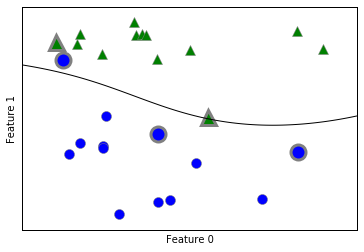

In [79]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

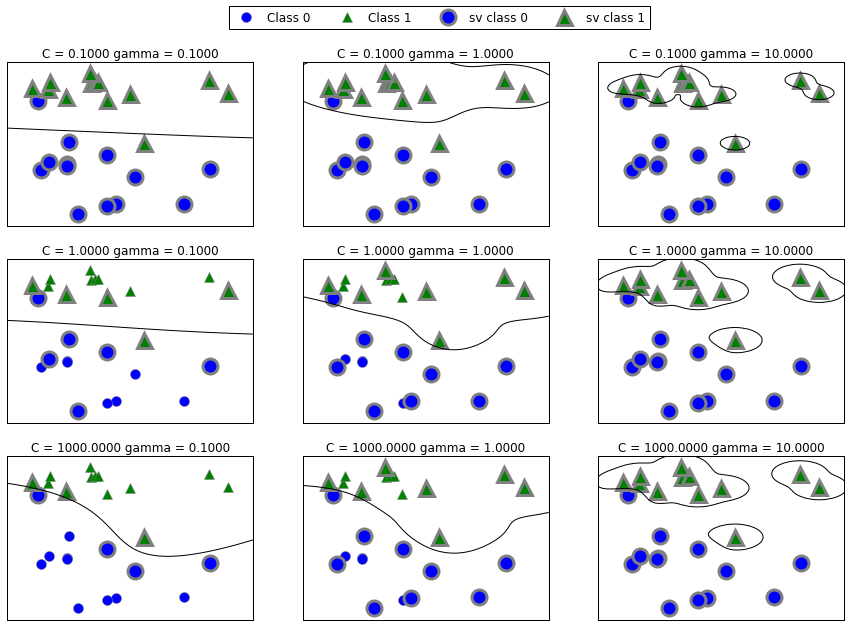

In [81]:
fig, axes = plt.subplots(3, 3, figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["Class 0", "Class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2), numpoints=1)

as gamma increases, complexity increases and the decision boundry focuses on single points.<br>
as gamma decreases, the decision boundry become near-linear as many points are considered near-by.

as C increases, boundry bends to correctly classify each point.<br>
as C decreases, model is more restricted with points having less influence on boundry.

Features with different orders of magnitude are devastating to Kernel SVM, let's look at the Breast Cancer dataset

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy of training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy of test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy of training set: 1.00
Accuracy of test set: 0.63


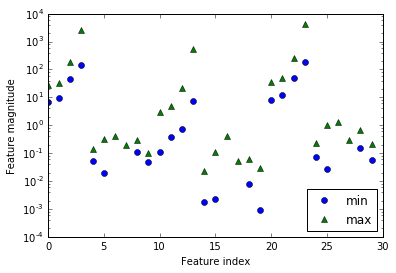

In [83]:
plt.plot(X_train.min(axis=0), 'o', label='min')
plt.plot(X_train.max(axis=0), '^', label='max')
plt.legend(loc=4, numpoints=1)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

To solve this problem, we must rescale each feature using MinMaxScaler.

In [84]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n{}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum for each feature
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [85]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [86]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


Still underfitting where test and training are similar.

In [87]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


## Neural Networks (Deep Learning)<a id="neural_nets"></a>
Variant of <a href="#linear">Linear models</a> with an extra stage.<br>
Rather than getting the prediction from a weighted sum directly, a Neural Net <br>
calculates weighted sums multiple times using an intermediate step.<br>
During the intermediate step, weighted sums are caluculated in the _hidden layer_,<br>
and one again from the _hidden layer_ to the output.

<a href="#top">Top</a>

Between each input and _hidden unit_ is a coeff (weight) to learn.<br>
The weighted sum of each _hidden unit_ is fed into a non-linear function:<br>
A _rectifying nonlinearity_ or recified linear unit (relu) <br>
or A _tangen hyperbolicus_ (tahn).
Which produces the last weighted sum for the output.

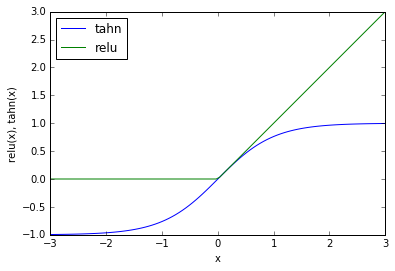

In [89]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tahn")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best", numpoints=1)
plt.xlabel("x")
plt.ylabel("relu(x), tahn(x)")

The number of hidden layers can vary from 10 to 10000.<br>
This idea is where Deep Learning comes from

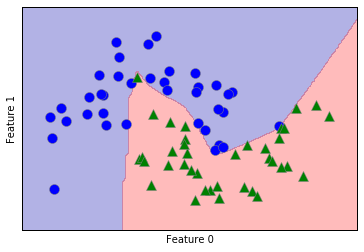

In [95]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    random_state=42)
mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The default hidden units is 100, let's reduce the complexity for this small dataset to 10 hidden units.

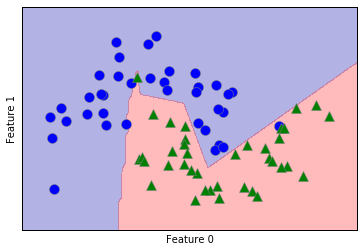

In [96]:
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

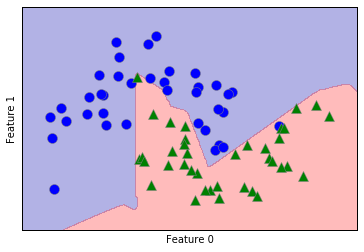

In [100]:
mlp = MLPClassifier(solver='lbfgs',random_state=0,
                    hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

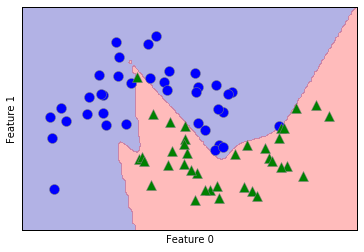

In [101]:
mlp = MLPClassifier(solver='lbfgs',activation='tanh',
                    random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")